

### The best known example of quantum cryptography is quantum key distribution which offers an information-theoretically secure solution to the key exchange problem. The advantage of quantum cryptography lies in the fact that it allows the completion of various cryptographic tasks that are proven or conjectured to be impossible using only classical (i.e. non-quantum) communication. 

#### For example, it is impossible to copy data encoded in a quantum state. If one attempts to read the encoded data, the quantum state will be changed due to wave function collapse (no-cloning theorem). This could be used to detect eavesdropping in quantum key distribution (QKD).

##### The main breakthrough came when we realized that photons were never meant to store information, but rather to transmit it 
###### [Bennett, Charles H.; et al. (1992). "Experimental quantum cryptography". Journal of Cryptology. 5 (1): 3–28. doi:10.1007/bf00191318. S2CID 206771454.]

### Quantum Computers Foundational topics

Classical computers use bits, while quantum computers use ***qubits***

* ##### Superposition 
Qubit can take 0,1 or any linear combination of the two
* ##### Gates
Qubits are manipulated using gates
* ##### Measurement
When a qubit is measured it looses its superposition and becomes a simple 0 or 1
* ##### Intereference
A quantum state is a linear combination and 0 state and 1 state. A computation applied to a quantum state applies to 0 and 1 states thus parallel computation. But during measurement only result from one state is measured and quantum gates are arranged such that it amlifies the correct answer and cancels the wrong ones a process called interference.
* ##### Entanglement 
When qubits are entangled their states become extreemly correlated. Changing the state of one qubit changes the state of the other

![ Introduction to quantum computing](intro2.png "intro to quantum computers")





##### Qiskit is IBM SDK for buidling quantum circuits and programs. Qiskit runtime runs and optimizes qiskit programs on real quantum computer service

##### Quantum computing LAB was created on IBM quantum Computing service. A snippet of the lab work is shown below

![ lab created on IBM ](lab.png "New lab at Quantum Computing Lab IBM")

##### Qiskit instruction set
![ quantum instruction set](instructions.png "quantum instruction set")

![ quantum instruction set](instructions2.png "quantum instruction set")

#### The teleportation task

1. ##### Creating the Entangled Pair
Using the ***had*** and ***cnot*** achieves an entangled pair

2. ##### Prepairing the payload
Alice can prepare the payload to be sent.
How she prepares it depends, of course, on the nature of the (quantum)   
information that she wants to send to Bob. She might write a value to   
the payload qubit, entangle it with some other QPU data, or even receive   
it from a previous computation in some
entirely separate part of her QPU

3. ##### Link the Payload to the Entangled Pair
The conditional nature of the CNOT operation can entangle
the states of two qubits.    
Alice now uses this fact to entangle her payload qubit with   
her half of the entangled pair she already shares with Bob

4. ##### Put the Payload into a Superposition
To make the link that Alice has created for her payload actually useful,   
she needs to finish by performing a HAD operation on her payload,

5. ##### READ Both of Alice’s Qubits
As we’ll see, it turns out that the results of this unavoidably    
destructive READ operation are crucial for the telepor‐tation protocol to work.    
Copying quantum states is not possible, even when using entanglement. The only    
option to communicate quantum states is to teleport them, and when teleporting,    
we must destroy the original

6. ##### Receive and Transform
Bob now holds a qubit indistinguishable
from Alice’s initial payload.

7. ##### Verify the Result
By reading Bob's final qubit value received



In [59]:
# COLAB = False

# if COLAB:
#     !pip install qiskit
# else:
#     !pip install qiskit

In [60]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np

In [61]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

┌───┐ ░ ┌───┐┌─┐
  q: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

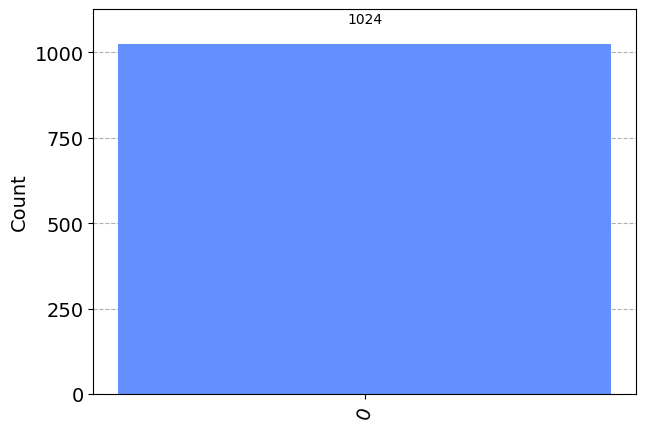

In [62]:
# 1, quantum register, 1 classical register

qc = QuantumCircuit(1, 1)

# Preparation of Alice's (Voter) qubit in state |+>
qc.h(0) # hadarmad gate, allow quantum state to be measured as 50% 0 0r 1

qc.barrier()

# Bob (Admin) receives the qubit and measures it in the X-basis
qc.h(0)
qc.measure(0, 0)

display(qc.draw())
simulator = Aer.get_backend('aer_simulator')
job = simulator.run(assemble(qc))
plot_histogram(job.result().get_counts())

┌───┐┌─┐ ░ ┌───┐┌─┐
  q: ┤ H ├┤M├─░─┤ H ├┤M├
     └───┘└╥┘ ░ └───┘└╥┘
c: 1/══════╩══════════╩═
           0          0

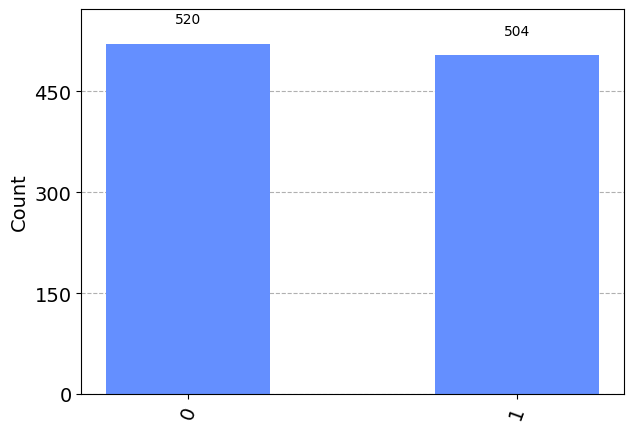

In [63]:
qc = QuantumCircuit(1, 1)

# Preparation of Alice's qubit in state |+>
qc.h(0)

# Alice sends the qubit to Bob. However, Eve taps into the system and intercepts the message
qc.measure(0, 0)
qc.barrier()

# Eve, after getting the message, passes it to Bob who still measures it in the X-basis
qc.h(0)
qc.measure(0, 0)

display(qc.draw())
simulator = Aer.get_backend('aer_simulator')
job = simulator.run(assemble(qc))
plot_histogram(job.result().get_counts())

#### Quantum Key Distribution with BB84 algorithm

- Step 1

Alice chooses a string of random bits, e.g.:   
1000101011010100
And a random choice of basis for each bit:   
ZZXZXXXZXZXXXXXX
Alice keeps these two pieces of information private to herself.

- Step 2

Alice then encodes each bit onto a string of qubits using the basis she chose;    
this means each qubit is in one of the states |0⟩ , |1⟩ , |+⟩ or |−⟩ , chosen at random.    
In this case, the string of qubits would look like
this:
    This is the message she sends to Bob.

- Step 3

Bob then measures each qubit at random, for example, he might use the bases:   
XZZZXZXZXZXZZZXZ
And Bob keeps the measurement results private.

- Step 4

Bob and Alice then publicly share which basis they used for each qubit.    
If Bob measured a qubit in the same basis Alice prepared it in, they use this to    
form part of their shared secret key, otherwise they discard the information for that bit.  

![ BB84 encryption illustration ](t.png "BB84 illustration")

- Step 5

Finally, Bob and Alice share a random sample of their keys, and if the samples match,    
they can be sure (to a small margin of error) that their transmission is successful.


![ BB84 encryption illustration ](bb84.png "BB84 illustration")




In [64]:
np.random.seed(seed=0)
n = 100
alice_bits = randint(2, size=n)
print(alice_bits)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]


This set of random bits is only known to Alice. Alice then encodes each bit on in the X or Z-basis at random,    
storing the choice of each qubit in alice_bases. In this case, a 0 means in "prepare in the Z-basis" and a 1 means "prepare in the X-basis"

In [65]:

# An array is created stating which qubits are recorded in which bases
alice_bases = randint(2, size=n)
print(f"Alice's biases: {alice_bases}")

Alice's biases: [1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]


Alice also keeps this knowledge private. The function below creates a list of    
QuantumCircuits each representing a single qubit in Alice's message.

In [82]:
def encode_message(bits, bases):
      message = []
      for i in range(n):
        qc = QuantumCircuit(1, 1)
        if bases[i] == 0: # Qubit prepared in Z-basis
          if bits[i] == 0:
            pass
          else: 
            qc.x(0)
        else: # Qubit prepared in X-basis
          if bits[i] == 0:
            qc.h(0)
          else:
            qc.x(0)
            qc.h(0)
        qc.barrier()
        message.append(qc)
      return message

message = encode_message(alice_bits, alice_bases)
print(message)

[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000206CA5D5450>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000206CA49C580>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000206CA49CAF0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000206CA49EBC0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000206CA49D780>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000206CA49C3A0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000206CA49CC10>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000206CA49D2A0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000206CA49DAE0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000206CA49E860>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000206CA49FCD0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000206CA49DA50>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000206CA49DB10>

The message of qubits is then sent to Bob over Eve's quantum channel.    
Bob then measures each qubit in the X or Z-basis at random and stores this information

In [67]:
bob_bases = randint(2, size=n)
print(f"Bob biases: {bob_bases}")

Bob biases: [1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1]


bob_bases stores Bob's choice for which basis he measures each qubit in.    
The function below applies the corresponding measurement and simulates the result of measuring each qubit.    
The measurement results are stored in bob_results

In [68]:
def measure_message(message, bases):
  backend = Aer.get_backend('aer_simulator')
  measurements = []
  for q in range(n):
    if bases[q] == 0: # Measuring in Z-basis
      message[q].measure(0, 0)
    if bases[q] == 1: # Measuring in X-basis
      message[q].h(0)
      message[q].measure(0, 0)
    simulator = Aer.get_backend('aer_simulator')
    qobj = assemble(message[q], shots=1, memory=True)
    result = simulator.run(qobj).result()
    measured_bit = int(result.get_memory() [0])
    measurements.append(measured_bit)
  return measurements

bob_results = measure_message(message, bob_bases)
# print(bob_results)

The circuit in message[0] (which represents the 0th qubit) has had an X-measurement added to it by Bob

In [69]:
message[6].draw()

┌───┐ ░ ┌───┐┌─┐
  q: ┤ X ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

Since Bob has by chance chosen to measure in the same basis Alice encoded the qubit in, Bob is guaranteed to get the result 0.    
For the 6th qubit (shown below), Bob's random choice measurement is not the same as Alice's and Bob's result has only a 50% chance of matching Alice's

In [70]:
print(bob_results)

[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0]


Bob keeps his results private
impliment a function for remove garbage to throw entries that do not match up

In [71]:
def remove_garbage(alice_bases, bob_bases, bits):
  good_bits = []
  for q in range (n):
    if alice_bases[q] == bob_bases[q]:
      good_bits.append(bits[q])
  return good_bits

discard the bits that do not match up and use the legitimate ones

In [72]:
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
print(f"Alice's key: {alice_key}")
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
print(f"Bobs's key: {bob_key}")


Alice's key: [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]
Bobs's key: [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]


let us see bob's keys


comparing the keys randomly to see if any manipulation has occured

In [73]:
def sample_bits(bits, selection):
  sample = []
  for i in selection:
    i = np.mod(i, len(bits))

    sample.append(bits.pop(i))
  return sample

broadcast the keys as they are already out there

In [74]:
sample_size = 15
bit_selection = randint(n, size = sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
print(f"bob's sample = {bob_sample}")
alice_sample = sample_bits(alice_key, bit_selection)
print(f"alice's sample = {alice_sample}")



bob's sample = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
alice's sample = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


check if the protocol worked correctly

In [75]:
bob_sample == alice_sample

True

##### With Interception
##### INTRODUCING THE EAVESDROPPER EVE!

In [76]:
np.random.seed(seed=3)
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

eve_bases = randint(2, size=n )
intercepted_message = measure_message(message, eve_bases)
print(intercepted_message)

[1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1]


##### eve's choice of basis is different from alice, hence changing the qubit form |+> to random state in z-basis, with 50% probability of |0> or |1>


In [77]:
message[0].draw()

┌───┐ ░ ┌─┐
  q: ┤ H ├─░─┤M├
     └───┘ ░ └╥┘
c: 1/═════════╩═
              0

now, bob receives the qubits and measures them either way, as he is not aware yet that interception has occured
if he were to measure the quibits the same way alice prepared them, then he would be guaranteed to measure 0, but due to the tapping that has occured, it introduces a chance/probability of 1/2 of measuring 1

In [78]:
np.random.seed(seed = 3)
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

eve_bases = randint(2, size=n )
intercepted_message = measure_message(message, eve_bases)

bob_bases = randint(2, size=n )
bob_results= measure_message(message, bob_bases)
message[0].draw()


┌───┐ ░ ┌─┐┌───┐┌─┐
  q: ┤ H ├─░─┤M├┤ H ├┤M├
     └───┘ ░ └╥┘└───┘└╥┘
c: 1/═════════╩═══════╩═
              0       0

discard the useless bits after bits after comparing them (alice and bob)


In [79]:
np.random.seed(seed = 3)
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

eve_bases = randint(2, size=n )
intercepted_message = measure_message(message, eve_bases)

bob_bases = randint(2, size=n )
bob_results= measure_message(message, bob_bases)

bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)

comparing the bits at random to check for interception


In [80]:
sample_size = 15
bit_selection = randint(n, size = sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
print("bob's sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice's sample = " + str(alice_sample))

bob's sample = [1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]
alice's sample = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


check how the protocol behaved

In [81]:
bob_sample == alice_sample

False

#### Physical representation of a Qubit

![ Physical representation of a Qubit ](physical.png "Physical representation of a Qubit")  

![ Physical representation of a Qubit ](physical2.png "Physical representation of a Qubit")